<a href="https://colab.research.google.com/github/abelnane/Spotify_Analisis/blob/main/SP_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Definir la ruta del archivo
file_path = "/content/drive/MyDrive/nuevo_supermarket_test_2025_practicing/supermarket_sales - Sheet1.csv"

# Cargar el archivo en un DataFrame
df = pd.read_csv(file_path)

# Mostrar información general y las primeras filas
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

(None,
     Invoice ID Branch       City Customer type  Gender  \
 0  750-67-8428      A     Yangon        Member  Female   
 1  226-31-3081      C  Naypyitaw        Normal  Female   
 2  631-41-3108      A     Yangon        Normal    Male   
 3  123-19-1176      A     Yangon        Member    Male   
 4  373-73-7910      A     Yangon        Normal    Male   
 
              Product line  Unit price  Quantity   Tax 5%     Total       Date  \
 0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
 1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
 2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
 3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
 4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   
 
     Time      Payment    cogs  gross margin percentage  gross income  Rating  
 0  13:08      Ewallet  522.83                 4.761905       2

In [ ]:
# Convertir la columna 'Date' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convertir la columna 'Time' a formato de hora
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Verificar los cambios
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

(None,
     Invoice ID Branch       City Customer type  Gender  \
 0  750-67-8428      A     Yangon        Member  Female   
 1  226-31-3081      C  Naypyitaw        Normal  Female   
 2  631-41-3108      A     Yangon        Normal    Male   
 3  123-19-1176      A     Yangon        Member    Male   
 4  373-73-7910      A     Yangon        Normal    Male   
 
              Product line  Unit price  Quantity   Tax 5%     Total       Date  \
 0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
 1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
 2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
 3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
 4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   
 
        Time      Payment    cogs  gross margin percentage  gross income  \
 0  13:08:00      Ewallet  522.83                 4.761905       26

<ipython-input-28-314a2485e1db>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_ciudad.index, y=ventas_por_ciudad.values, palette="Blues_r")


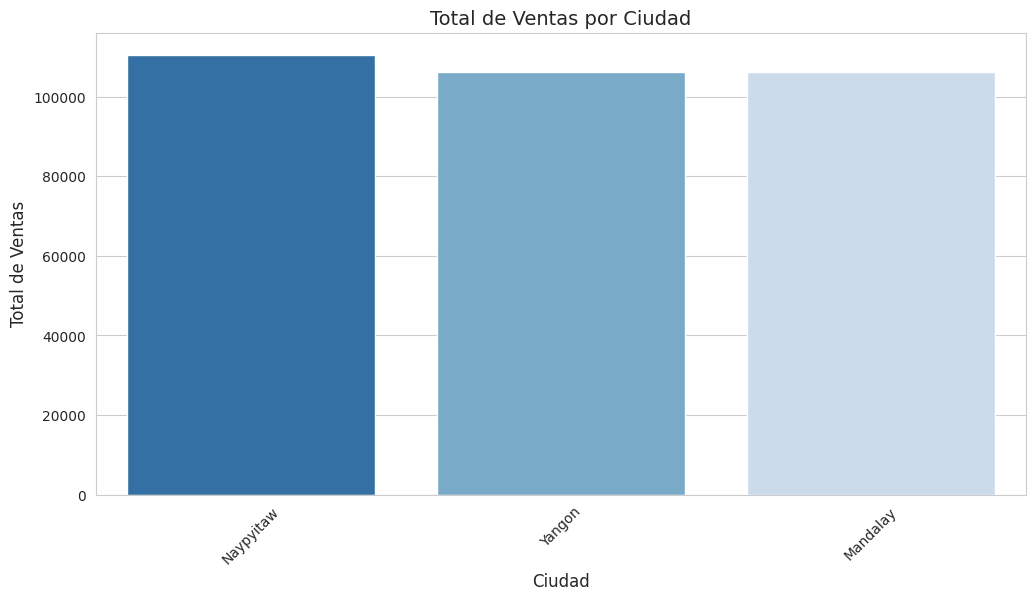

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Ventas totales por ciudad
ventas_por_ciudad = df.groupby("City")["Total"].sum().sort_values(ascending=False)

# Gráfico de barras
sns.barplot(x=ventas_por_ciudad.index, y=ventas_por_ciudad.values, palette="Blues_r")
plt.title("Total de Ventas por Ciudad", fontsize=14)
plt.xlabel("Ciudad", fontsize=12)
plt.ylabel("Total de Ventas", fontsize=12)
plt.xticks(rotation=45)
plt.show()


<ipython-input-29-371eb83c1285>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productos_mas_vendidos.values, y=productos_mas_vendidos.index, palette="viridis")


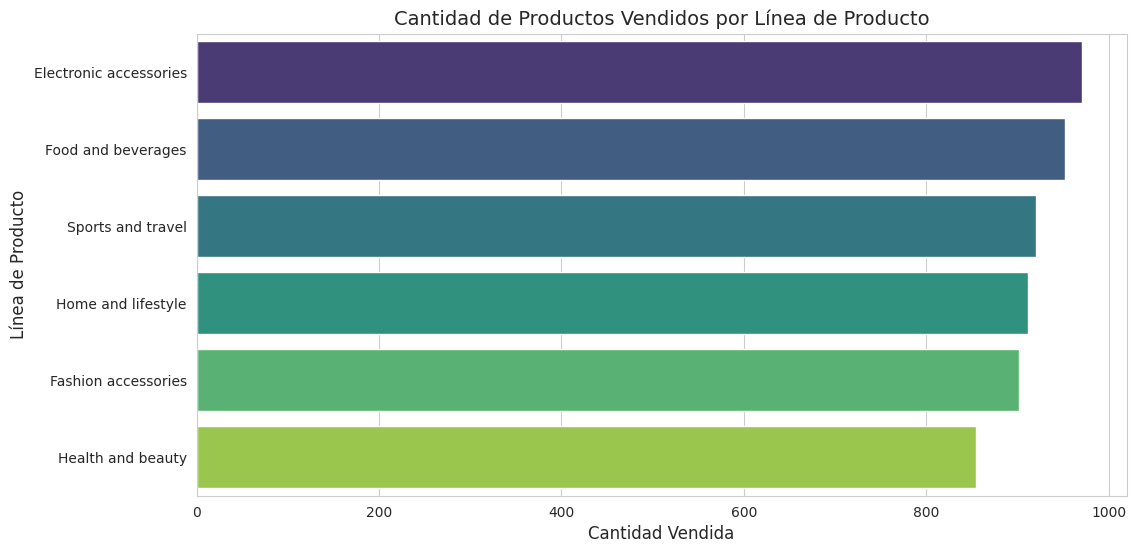

In [ ]:
# Configurar figura
plt.figure(figsize=(12, 6))

# Productos más vendidos en cantidad
productos_mas_vendidos = df.groupby("Product line")["Quantity"].sum().sort_values(ascending=False)

# Gráfico de barras
sns.barplot(x=productos_mas_vendidos.values, y=productos_mas_vendidos.index, palette="viridis")
plt.title("Cantidad de Productos Vendidos por Línea de Producto", fontsize=14)
plt.xlabel("Cantidad Vendida", fontsize=12)
plt.ylabel("Línea de Producto", fontsize=12)
plt.show()


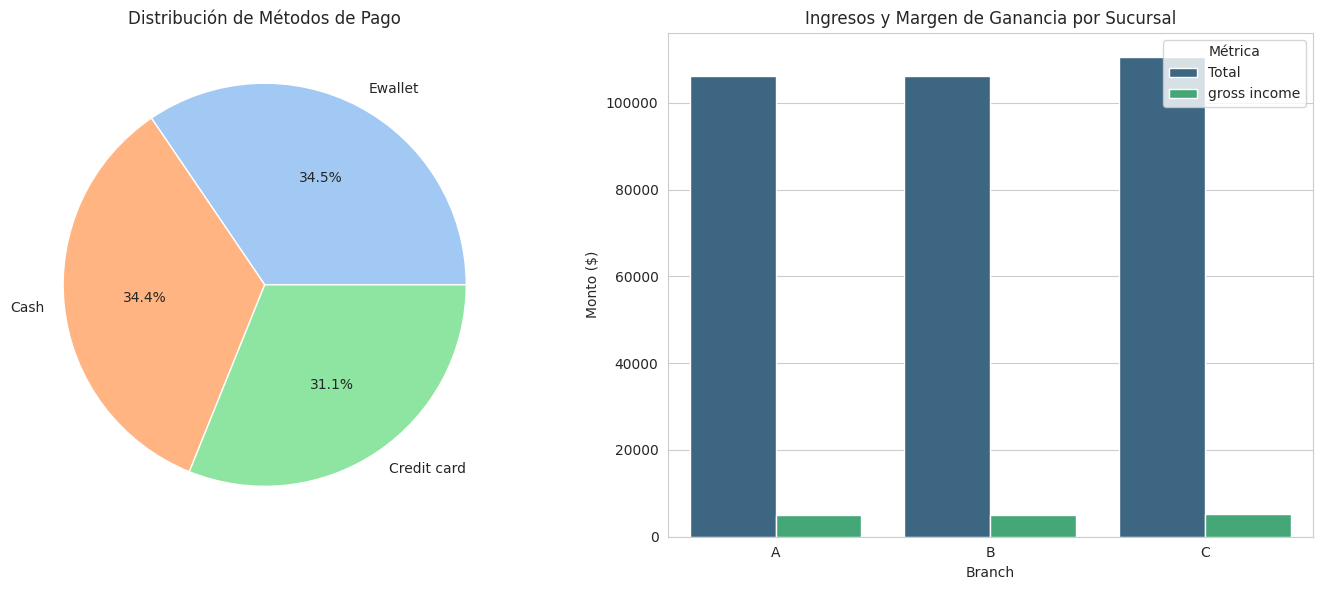

In [ ]:


# Configuración de estilo
sns.set_style("whitegrid")

# Figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de distribución de métodos de pago
payment_counts = df["Payment"].value_counts()
axes[0].pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
axes[0].set_title("Distribución de Métodos de Pago")

# Gráfico de ingresos y margen de ganancia por sucursal
branch_summary = df.groupby("Branch")[["Total", "gross income"]].sum().reset_index()
branch_summary = branch_summary.melt(id_vars="Branch", var_name="Métrica", value_name="Monto")

sns.barplot(data=branch_summary, x="Branch", y="Monto", hue="Métrica", ax=axes[1], palette="viridis")
axes[1].set_title("Ingresos y Margen de Ganancia por Sucursal")
axes[1].set_ylabel("Monto ($)")

plt.tight_layout()
plt.show()


<ipython-input-34-fbfcba9687cd>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_sales.index, x=product_sales.values, ax=axes[0, 1], palette="coolwarm")
<ipython-input-34-fbfcba9687cd>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Payment", y="Quantity", palette="muted", ax=axes[1, 0])
<ipython-input-34-fbfcba9687cd>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_sales.index, y=time_sales.values, palette="viridis", ax=axes[2, 0])


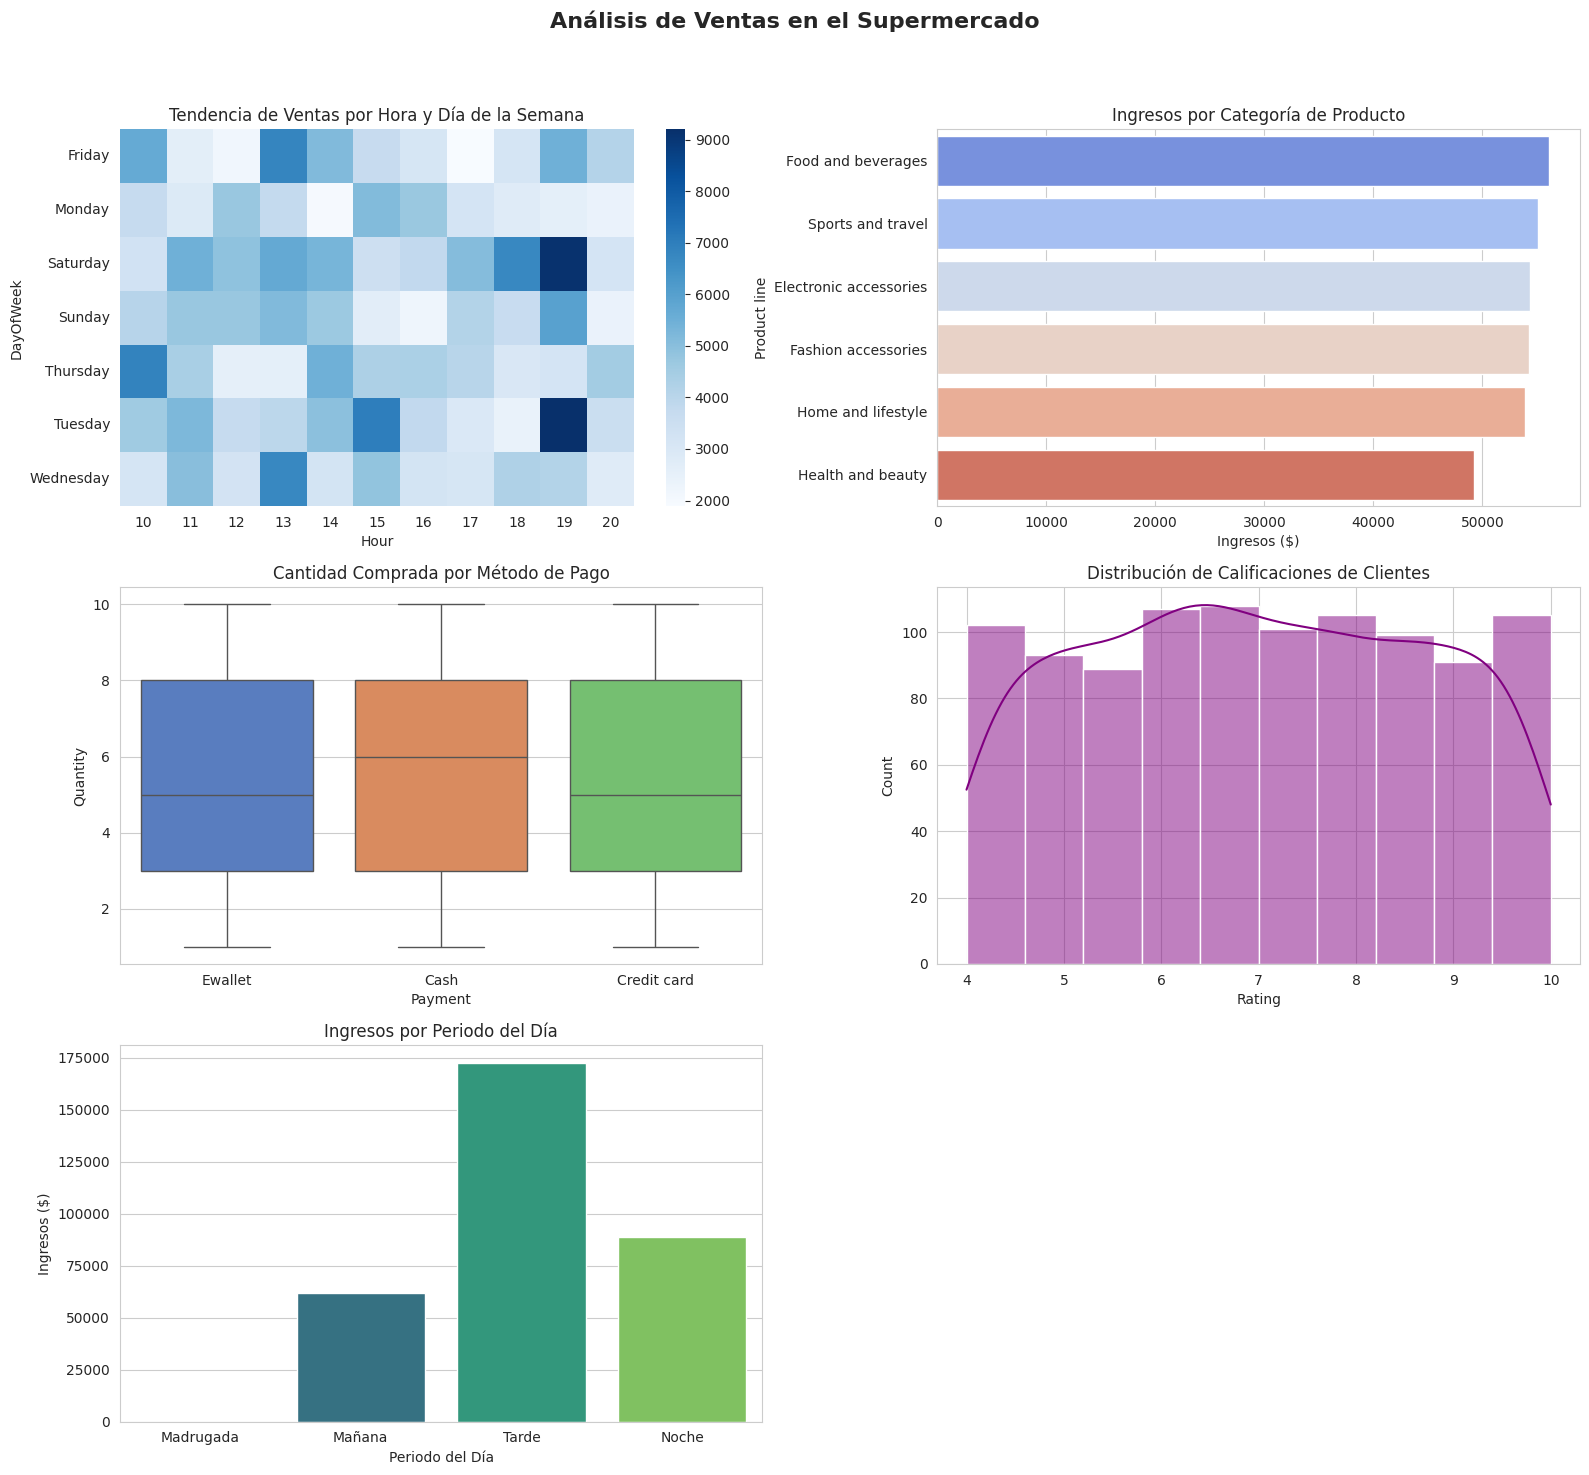

In [ ]:
import numpy as np

# Convertir la columna 'Date' a formato datetime y extraer día de la semana
df["Date"] = pd.to_datetime(df["Date"])
df["DayOfWeek"] = df["Date"].dt.day_name()

# Extraer hora de la columna 'Time' y convertir a entero
# Extraer la hora correctamente convirtiendo la columna a string y luego a entero
df["Hour"] = df["Time"].astype(str).str[:2].astype(int)

# Crear una columna de periodo del día corregida
df["TimePeriod"] = pd.cut(df["Hour"], bins=[0, 6, 12, 18, 24], labels=["Madrugada", "Mañana", "Tarde", "Noche"], right=False)

# Crear figura y ejes
# Crear figura y ejes con solo 5 gráficos
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
fig.suptitle("Análisis de Ventas en el Supermercado", fontsize=16, fontweight='bold')

# 1. Heatmap de ventas por hora y día de la semana
heatmap_data = df.groupby(["DayOfWeek", "Hour"])["Total"].sum().unstack()
sns.heatmap(heatmap_data, cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title("Tendencia de Ventas por Hora y Día de la Semana")

# 2. Ingresos por categoría de producto
product_sales = df.groupby("Product line")["Total"].sum().sort_values(ascending=False)
sns.barplot(y=product_sales.index, x=product_sales.values, ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title("Ingresos por Categoría de Producto")
axes[0, 1].set_xlabel("Ingresos ($)")

# 3. Relación entre cantidad comprada y método de pago
sns.boxplot(data=df, x="Payment", y="Quantity", palette="muted", ax=axes[1, 0])
axes[1, 0].set_title("Cantidad Comprada por Método de Pago")

# 4. Distribución de calificaciones de clientes
sns.histplot(df["Rating"], bins=10, kde=True, color="purple", ax=axes[1, 1])
axes[1, 1].set_title("Distribución de Calificaciones de Clientes")

# 5. Preferencias de compra según el horario del día (versión corregida)
sns.barplot(x=time_sales.index, y=time_sales.values, palette="viridis", ax=axes[2, 0])
axes[2, 0].set_title("Ingresos por Periodo del Día")
axes[2, 0].set_ylabel("Ingresos ($)")
axes[2, 0].set_xlabel("Periodo del Día")

# Eliminar el sexto gráfico vacío
fig.delaxes(axes[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
from google.colab import files

files.download("/content/drive/MyDrive/nuevo_supermarket_test_2025_practicing/supermarket_sales - Sheet1.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>